# Avance Proyecto 1: Análisis eploratorio

### Subtítulo:
Descripción de por qué es necesario

In [10]:
#Código

### Cantidad de compras registradas por la tienda:

Es importante conocer el tamaño de la base de datos y cuántas compras fueron registradas para tener idea del volumen de información.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo
df = pd.read_csv("../datasets/customer_purchases/customer_purchases_train.csv")

# Total de compras
total_ventas = len(df)
print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


### Cantidad de usuarios:
Identificar el número de clientes únicos permite estimar la diversidad de usuarios y su participación en la tienda.

In [33]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()
print(f"Cantidad de clientes únicos: {unique_customers}")

Cantidad de clientes únicos: 500


### Clientes con múltiples compras:

Analizar cuántos clientes realizan varias compras ayuda a identificar usuarios frecuentes y segmentar por lealtad.

SEGMENTACIÓN DE CLIENTES (cada 5 compras):
1-5 compras: 9 clientes
6-10 compras: 106 clientes
11-15 compras: 189 clientes
16-20 compras: 123 clientes
21-25 compras: 58 clientes
26-30 compras: 13 clientes
31-35 compras: 2 clientes


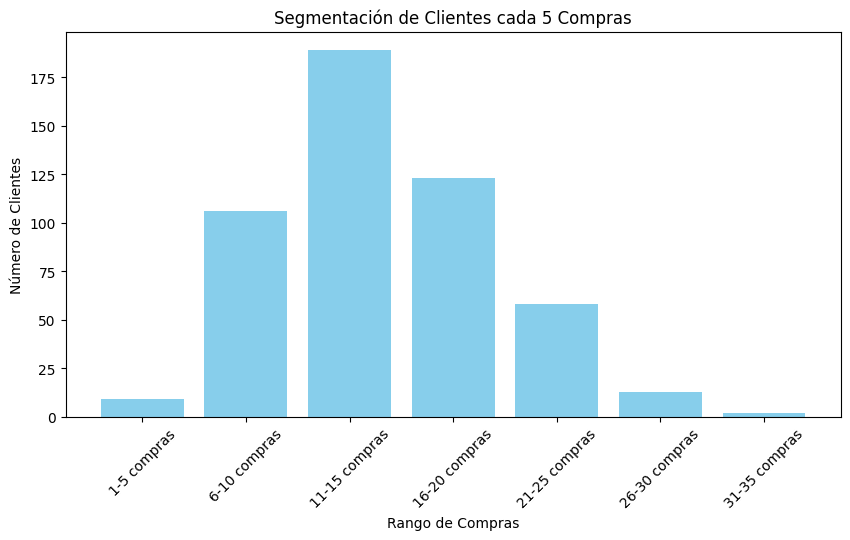

In [34]:
# Frecuencia de compras por cliente
customer_freq = df['customer_id'].value_counts()

# Segmentar cada 5 compras
segmentos_para_grafico = {}
for i in range(1, customer_freq.max() + 1, 5):
    segmento_min, segmento_max = i, i + 4
    segment_name = f'{segmento_min}-{segmento_max} compras'
    clientes_segmento = customer_freq[
        (customer_freq >= segmento_min) & (customer_freq <= segmento_max)
    ]
    if not clientes_segmento.empty:
        segmentos_para_grafico[segment_name] = len(clientes_segmento)

# Mostrar
print("SEGMENTACIÓN DE CLIENTES (cada 5 compras):")
for seg, cant in segmentos_para_grafico.items():
    print(f"{seg}: {cant} clientes")

# Gráfico
plt.figure(figsize=(10,5))
plt.bar(segmentos_para_grafico.keys(), segmentos_para_grafico.values(), color='skyblue')
plt.title('Segmentación de Clientes cada 5 Compras')
plt.xlabel('Rango de Compras')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

### Genero de los usuarios:

Permite observar la distribución de clientes según género, lo cual puede relacionarse con preferencias de productos.

SEGMENTACIÓN POR GÉNERO:
male: 195 clientes
female: 192 clientes
No especificado: 113 clientes


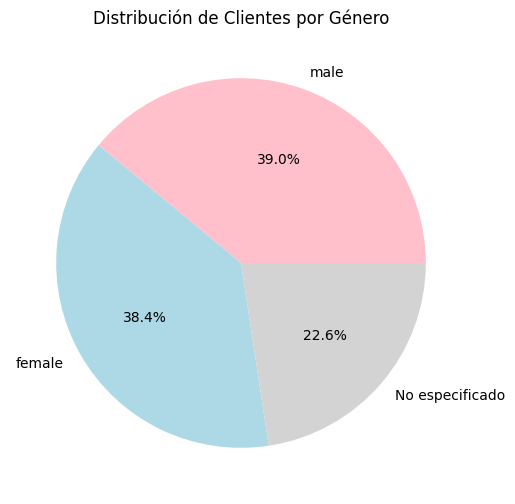

In [35]:
# Seleccionar un género por cliente
customer_genders = df.groupby('customer_id')['customer_gender'].first()
genero_counts = customer_genders.fillna('No especificado').value_counts()

print("SEGMENTACIÓN POR GÉNERO:")
for genero, cantidad in genero_counts.items():
    print(f"{genero}: {cantidad} clientes")

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%',
        colors=['pink','lightblue','lightgray'])
plt.title('Distribución de Clientes por Género')
plt.show()

### Rangos de edad de usuarios:
Conocer la edad mínima, máxima y promedio permite segmentar clientes en grupos demográficos.

EDADES DE LOS USUARIOS:
Edad mínima: 18 años
Edad máxima: 74 años
Edad promedio: 41.0 años
Edad mediana: 40.5 años

SEGMENTACIÓN POR EDAD:
18-25 años: 102 clientes
26-35 años: 101 clientes
36-45 años: 126 clientes
46+ años: 171 clientes


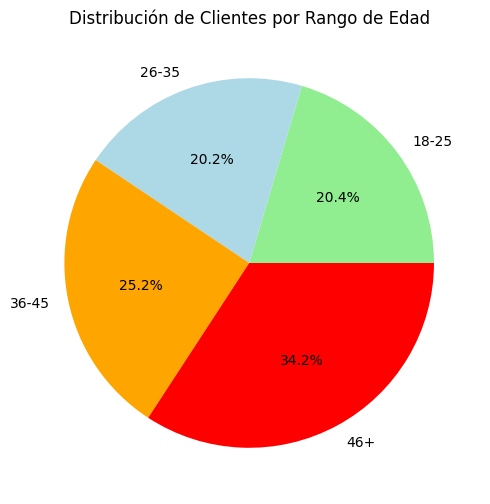

In [36]:
# Calcular edad al 21/09/2025
ref_date = pd.to_datetime("2025-09-21")
df['edad'] = (ref_date - pd.to_datetime(df['customer_date_of_birth'])).dt.days // 365

# Edad única por cliente
customer_ages = df.groupby('customer_id')['edad'].first()

print("EDADES DE LOS USUARIOS:")
print(f"Edad mínima: {customer_ages.min()} años")
print(f"Edad máxima: {customer_ages.max()} años")
print(f"Edad promedio: {customer_ages.mean():.1f} años")
print(f"Edad mediana: {customer_ages.median()} años")

# Segmentación por rangos
rangos = {'18-25': (18,25), '26-35': (26,35), '36-45': (36,45), '46+': (46,100)}
segmentos_edad = {}
for rango, (min_e, max_e) in rangos.items():
    if rango == '46+':
        clientes = customer_ages[customer_ages >= min_e]
    else:
        clientes = customer_ages[(customer_ages >= min_e) & (customer_ages <= max_e)]
    segmentos_edad[rango] = len(clientes)

print("\nSEGMENTACIÓN POR EDAD:")
for r, c in segmentos_edad.items():
    print(f"{r} años: {c} clientes")

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(segmentos_edad.values(), labels=segmentos_edad.keys(), autopct='%1.1f%%',
        colors=['lightgreen','lightblue','orange','red'])
plt.title('Distribución de Clientes por Rango de Edad')
plt.show()